<a href="https://colab.research.google.com/github/OswaldVc/Arduino/blob/main/Indicadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

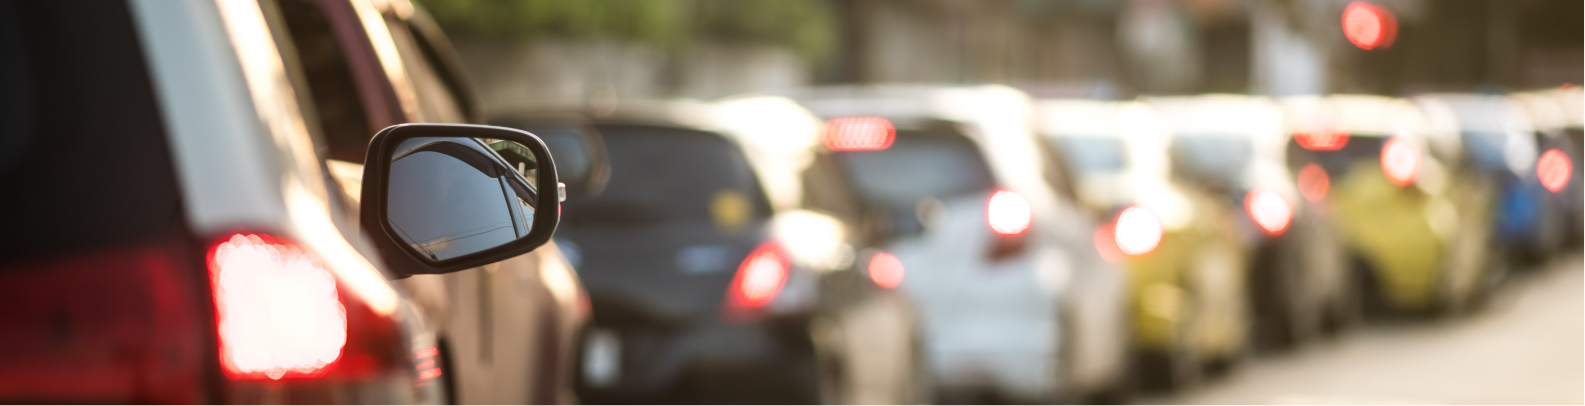

In [1]:
# ------- Importación de Módulos ------------

from locale import normalize
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import missingno as msno
import seaborn

## Data cleaning y data wrangling
import pandas            as pd
import numpy             as np

## Visualización
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.express    as px
import warnings

sns.set_style("darkgrid") ## Estilo para los gráficos
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [3]:
## Conentando con google drive.
%load_ext autoreload
%autoreload 2
from google.colab import drive
drive.mount('/content/drive')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/3. LIBROS COLAB/INFORMES/Masivo_Capital/Data/

/content/drive/MyDrive/3. LIBROS COLAB/INFORMES/Masivo_Capital/Data


In [5]:
!ls

'BRASIL ALIMENTADORES.gsheet'   Resultado.csv
'BRASIL ALIMENTADORES.xlsx'     Resultado.xlsx
'BRASIL ZONAL.gsheet'	       'SALITRE SUBA.gsheet'
'BRASIL ZONAL.xlsx'	       'SALITRE SUBA.xlsx'
 CIPRES_AL.gsheet	       'SAN BERNARDINO.gsheet'
 CIPRES_AL.xlsx		       'SAN BERNARDINO_P.gsheet'
 CIPRESS.gsheet		       'SAN BERNARDINO_P.xlsx'
 CIPRESS.xlsx		       'SAN BERNARDINO.xlsx'
 INDICAD_1.gsheet	       'TIERRA BUENA (1).gsheet'
 INDICADORES.csv	       'TIERRA BUENA.gsheet'
'MARIA JUANA F.gsheet'	       'TIERRA BUENA.xlsx'
'MARIA JUANA F.xlsx'


In [6]:
url = "INDICADORES.csv"
df = pd.read_csv(url, sep = ";", decimal=",")
df.head()

,PATIO,MES,SIMPLE,LESIONADOS,VICTIMA MORTAL,ISV
0,TIERRA BUENA,Julio,61,9,0,"0,9"
1,TIERRA BUENA,Agosto,72,15,0,"1,15"
2,TIERRA BUENA,Septiembre,64,12,0,"0,94"
3,TIERRA BUENA,Octubre,35,6,1,"1,2"
4,MARIA JUANA,Julio,36,3,0,"0,79"


In [7]:
df.dtypes

PATIO             object
MES               object
SIMPLE             int64
LESIONADOS         int64
VICTIMA MORTAL     int64
ISV               object
dtype: object

In [8]:
df['MES'] = df['MES'].str.upper() ## --------------- >>>>> CONVERTIR FEATURE A MAYÚSCULAS
df['PATIO'] = df['PATIO'].str.upper()
df.head()

,PATIO,MES,SIMPLE,LESIONADOS,VICTIMA MORTAL,ISV
0,TIERRA BUENA,JULIO,61,9,0,"0,9"
1,TIERRA BUENA,AGOSTO,72,15,0,"1,15"
2,TIERRA BUENA,SEPTIEMBRE,64,12,0,"0,94"
3,TIERRA BUENA,OCTUBRE,35,6,1,"1,2"
4,MARIA JUANA,JULIO,36,3,0,"0,79"


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text major ticklabel objects>)

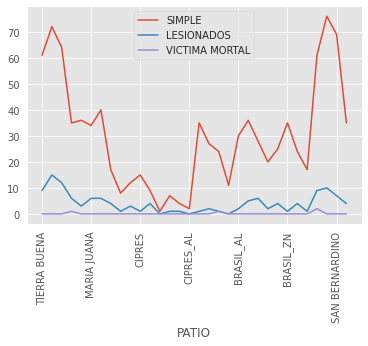

In [39]:
df.plot(x="PATIO", y=["SIMPLE", "LESIONADOS", "VICTIMA MORTAL", "ISV"]);
plt.xticks(rotation = 90)

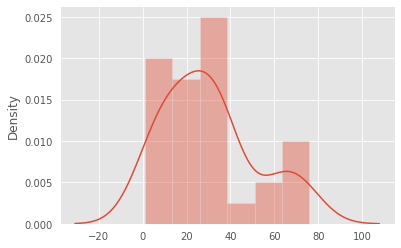

In [40]:
sns.distplot(x=df['SIMPLE'])

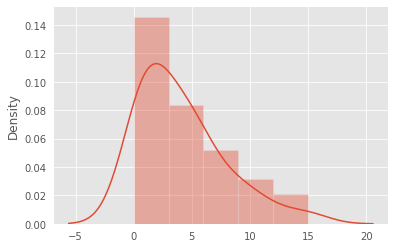

In [16]:
sns.distplot(x=df['LESIONADOS'])

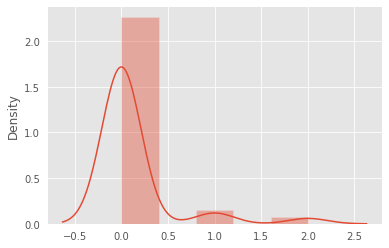

In [17]:
sns.distplot(x=df['VICTIMA MORTAL'])

In [22]:
accidentes_por_patio = pd.crosstab(df['PATIO'], df['SIMPLE'],normalize='index')
accidentes_por_patio

SIMPLE,1,2,4,7,8,9,11,12,15,17,...,30,34,35,36,40,61,64,69,72,76
PATIO,,,,,,,,,,,,,,,,,,,,,
BRASIL_AL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.25,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00
BRASIL_ZN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,...,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CIPRES,0.00,0.00,0.00,0.00,0.25,0.25,0.00,0.25,0.25,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CIPRES_AL,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
MARIA JUANA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,...,0.00,0.25,0.00,0.25,0.25,0.00,0.00,0.00,0.00,0.00
SAN BERNARDINO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.25,0.00,0.00,0.25,0.00,0.25,0.00,0.25
SUBA SALITRE_ZN,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,...,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00
TIERRA BUENA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.25,0.00,0.00,0.25,0.25,0.00,0.25,0.00


In [33]:
accidentes_por_mes = pd.crosstab(df['MES'], df['SIMPLE'],normalize='index')
accidentes_por_mes


SIMPLE,1,2,4,7,8,9,11,12,15,17,...,30,34,35,36,40,61,64,69,72,76
MES,,,,,,,,,,,,,,,,,,,,,
AGOSTO,0.000,0.000,0.000,0.125,0.000,0.000,0.000,0.125,0.000,0.00,...,0.000,0.125,0.125,0.125,0.000,0.00,0.000,0.000,0.125,0.125
JULIO,0.125,0.000,0.000,0.000,0.125,0.000,0.000,0.000,0.000,0.00,...,0.125,0.000,0.125,0.125,0.000,0.25,0.000,0.000,0.000,0.000
OCTUBRE,0.000,0.125,0.000,0.000,0.000,0.125,0.125,0.000,0.000,0.25,...,0.000,0.000,0.250,0.000,0.000,0.00,0.000,0.000,0.000,0.000
SEPTIEMBRE,0.000,0.000,0.125,0.000,0.000,0.000,0.000,0.000,0.125,0.00,...,0.000,0.000,0.000,0.000,0.125,0.00,0.125,0.125,0.000,0.000


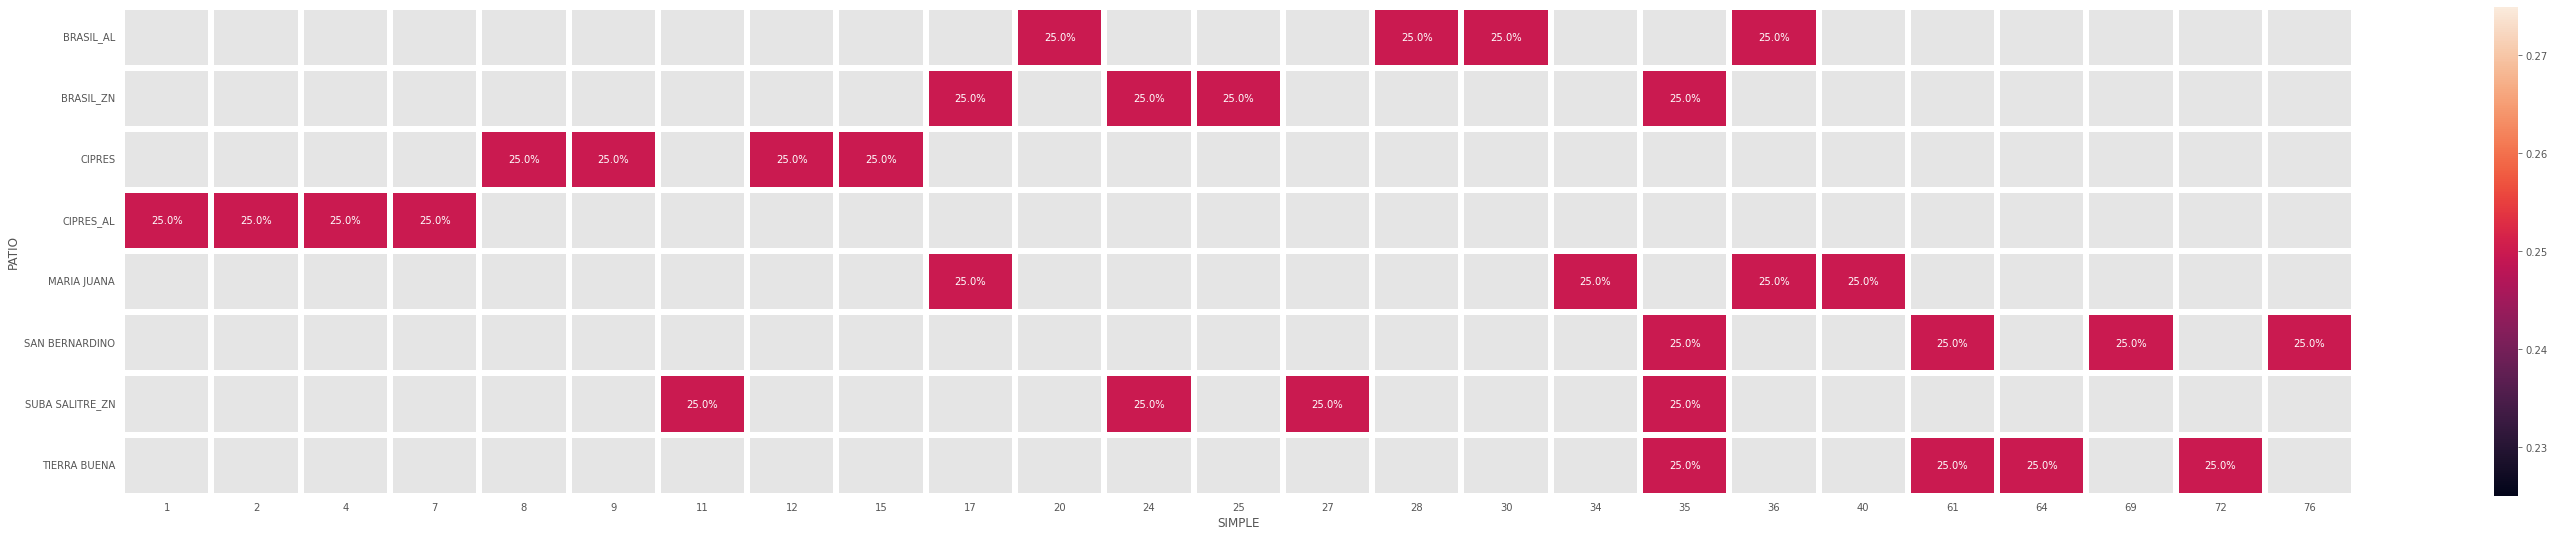

In [32]:
fig, ax = plt.subplots(figsize=(50, 9))
mascara = accidentes_por_patio == 0
a = sns.heatmap(accidentes_por_patio, linewidths=5, fmt='.1%', annot=True, mask=mascara, ax=ax)
a.set_ylabel('PATIO');

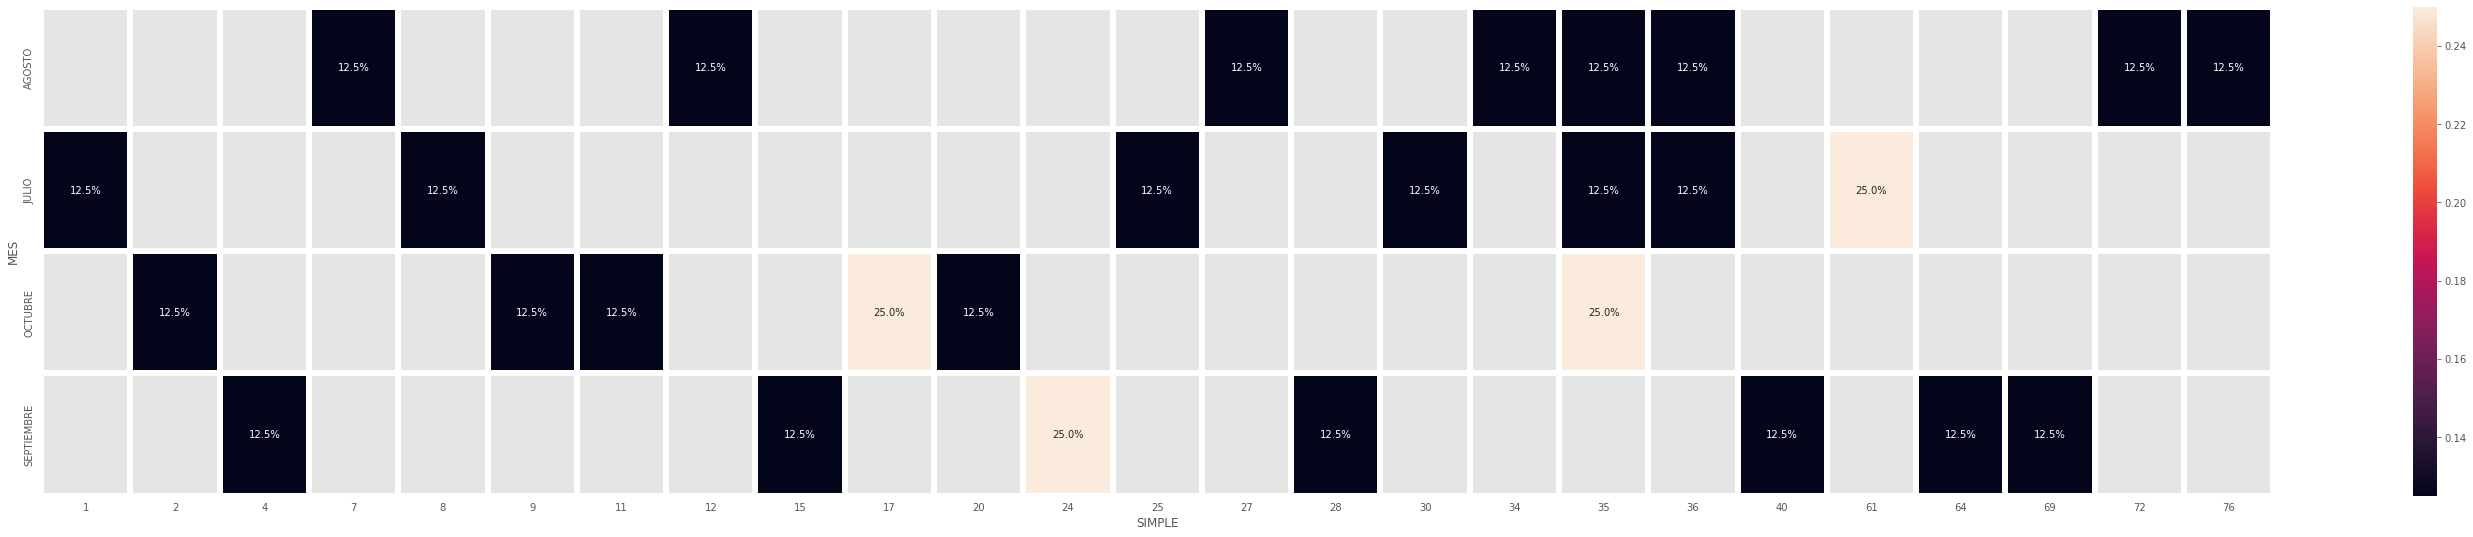

In [35]:
fig, ax = plt.subplots(figsize=(50, 9))
mascara = accidentes_por_mes == 0
a = sns.heatmap(accidentes_por_mes, linewidths=5, fmt='.1%', annot=True, mask=mascara, ax=ax)
a.set_ylabel('MES');